In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

In [ ]:
#Data Profiling
#Data preparation(Data clean, Feature Engineering)
#EDA
#Find final insights

Data Profiing

In [ ]:
df=pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
print(cat_cols)
print(num_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
for c in cat_cols:
  if c not in ('customerID','TotalCharges'):
    print(f'{c} : {df[c].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

/tmp/ipython-input-11-3929950690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2552.882494  1531.796094
               std    2327.590132  1890.822994
               min      18.800000    18.850000
               25%     579.575000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

Data cleansing

In [ ]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
#df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')

In [ ]:
#check duplicate
df.duplicated().sum()
##in case
##df.drop_duplicates(inplace=True)

np.int64(0)

**Feature Enfineering**


In [ ]:
##apply buckets (segmentation) on continuous cols

In [ ]:
def tenure_group(tenure):
  if tenure <= 12:
    return 'New'
  elif tenure <= 24:
    return 'Established'
  else:
    return 'Loyal'

In [ ]:
df['tenure_group']=df['tenure'].apply(tenure_group)

In [ ]:
df[['tenure','tenure_group']].head()

,tenure,tenure_group
0,1,New
1,34,Loyal
2,2,New
3,45,Loyal
4,2,New


In [ ]:
##add new column: High charger customers
charge_threshold=df['MonthlyCharges'].quantile(0.75)
df['high_charger']=(df['MonthlyCharges']>charge_threshold).astype('int')

In [ ]:
df.groupby(['Churn','high_charger'])['high_charger'].count()

Churn  high_charger
No     0               3994
       1               1180
Yes    0               1291
       1                578
Name: high_charger, dtype: int64

In [ ]:
#
df['SeniorAlone']=((df['SeniorCitizen']==1) & (df['Partner']=='No') & (df['Dependents']=='No')).astype('int')

In [ ]:
df.groupby(['Churn','SeniorAlone'])['SeniorAlone'].count()

Churn  SeniorAlone
No     0              4889
       1               285
Yes    0              1593
       1               276
Name: SeniorAlone, dtype: int64

In [ ]:
df['SeniorAlone'].value_counts()

,count
SeniorAlone,
0,6482
1,561


<!-- **EDA**
Uni-variate -> explore one field (one feature)
Bi-vairate -> use only 2 features
mulit-vairate  -> multi columns -->

EDA
Uni variate **bold text**

Text(0.5, 1.0, 'Churn Ratio')

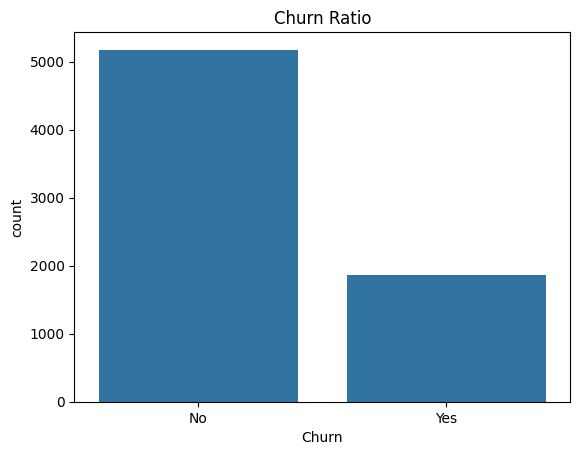

In [ ]:
# measure churn ratio
import seaborn as sns
sns.countplot(x='Churn',data=df)
plt.title('Churn Ratio')


Text(0.5, 1.0, 'Churn Ratio')

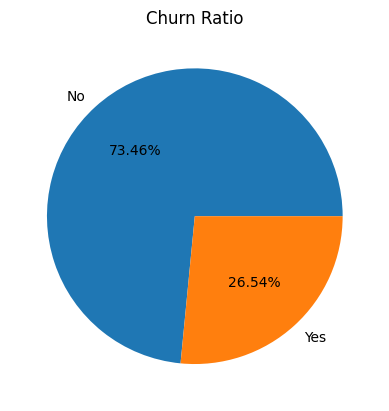

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].unique(),autopct='%1.2f%%')
plt.title('Churn Ratio')

Text(0.5, 1.0, 'Churn Ratio')

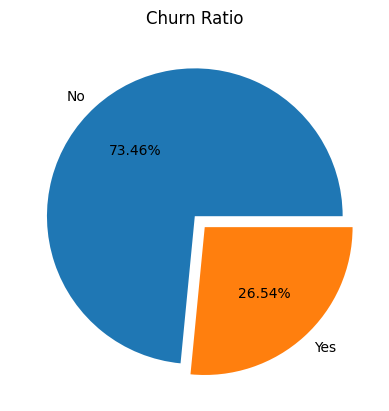

In [ ]:
churn_count=df['Churn'].value_counts()
labels=['No','Yes']
plt.pie(churn_count,labels=labels,autopct='%1.2f%%', explode=(0, 0.1))
plt.title('Churn Ratio')

Text(0.5, 1.0, 'Distribution of Tenure')

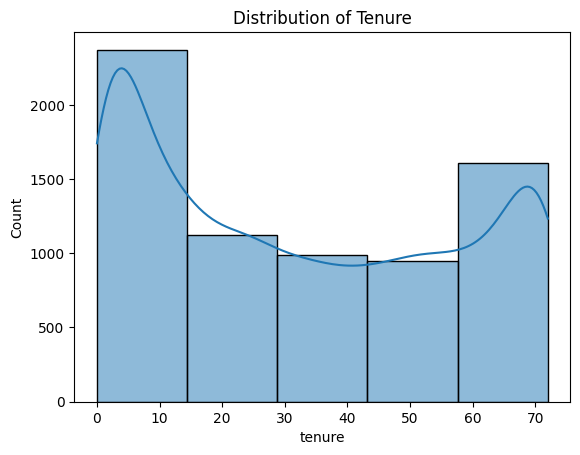

In [ ]:
#Distribution of Tenur
sns.histplot(df['tenure'], bins=5, kde=True)
plt.title('Distribution of Tenure')

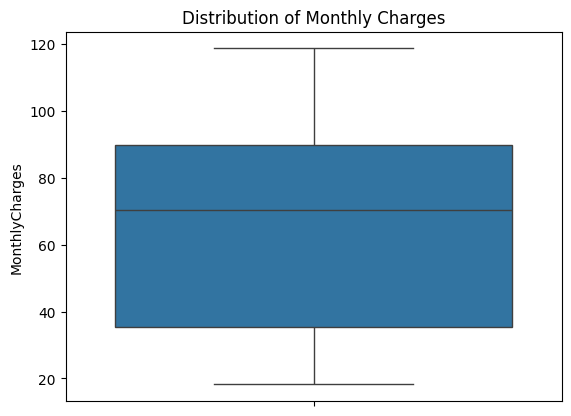

In [ ]:
sns.boxplot(y='MonthlyCharges', data=df)
plt.title('Distribution of Monthly Charges')
plt.show()

**EDA BI-variant**

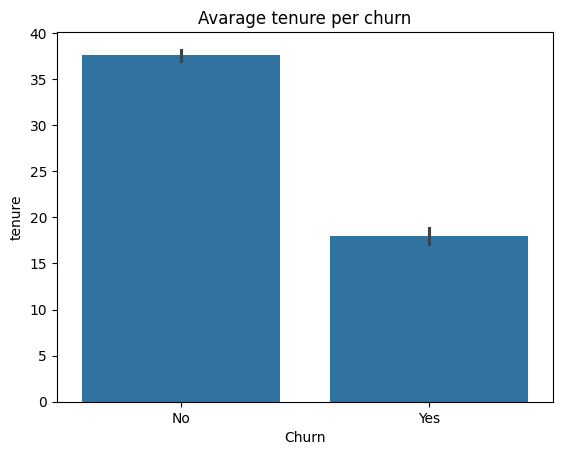

In [ ]:
#Avarage tenurity per churn
sns.barplot(x='Churn',y='tenure',data=df) ##average by defult / estimator='median'
plt.title('Avarage tenure per churn')
plt.show()
#This means, new customers are churning

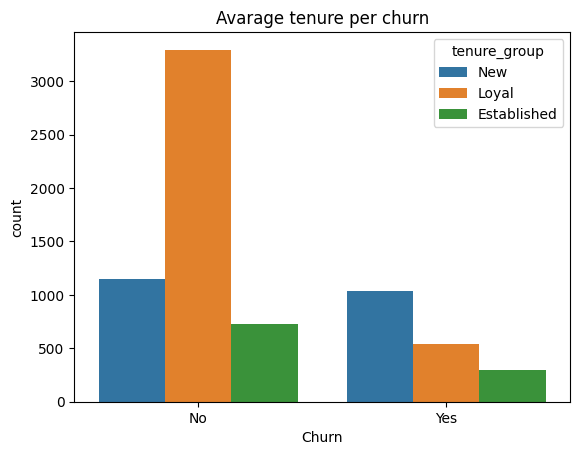

In [ ]:
sns.countplot(x='Churn',hue='tenure_group',data=df)
plt.title('Avarage tenure per churn')
plt.show()
#

In [ ]:
#here's a risk, some loyal customers are leavinf (churn)

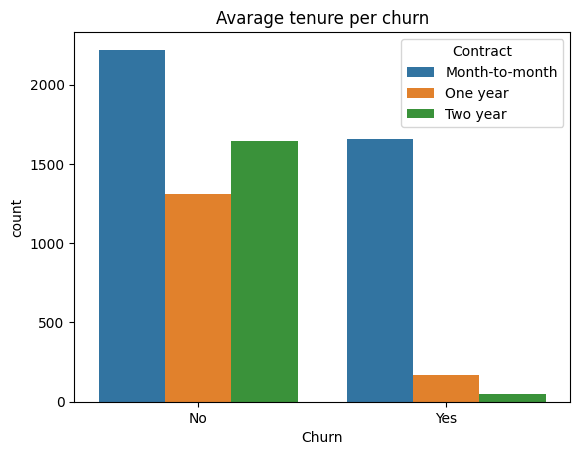

In [ ]:
sns.countplot(x='Churn',hue='Contract',data=df)
plt.title('Avarage tenure per churn')
plt.show()
#

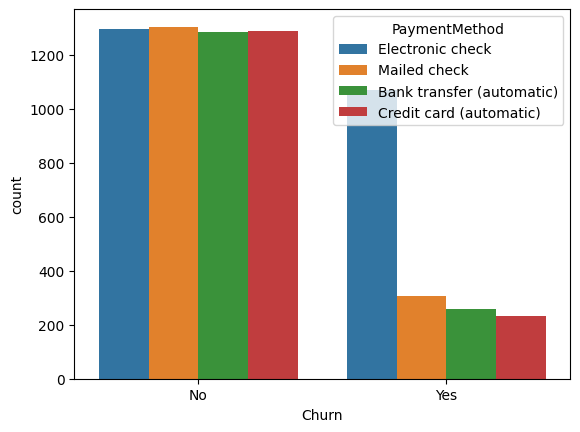

In [ ]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)
plt.title('')
plt.show()

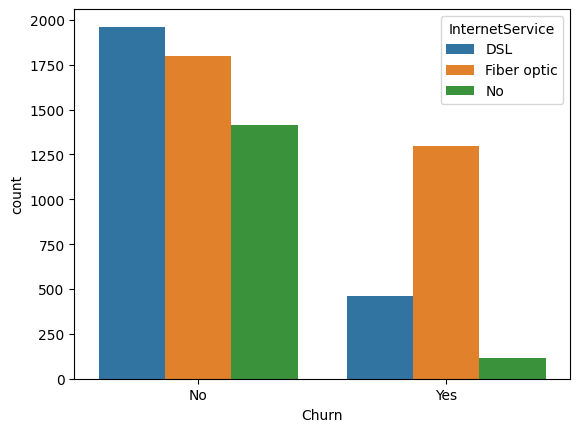

In [ ]:
sns.countplot(x='Churn',hue='InternetService',data=df)
plt.title('')
plt.show()

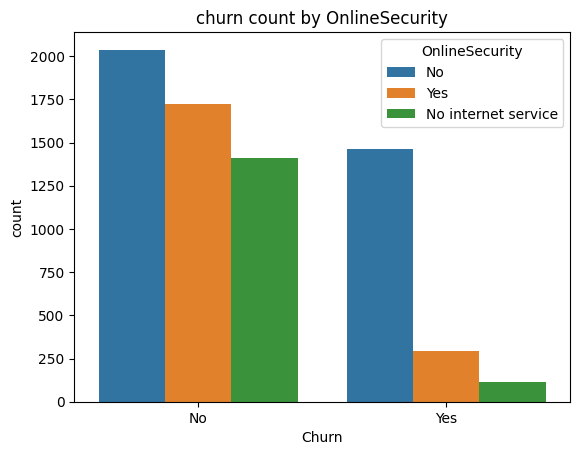

In [ ]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)
plt.title('churn count by OnlineSecurity')
plt.show()



**EDA Multi-variat**

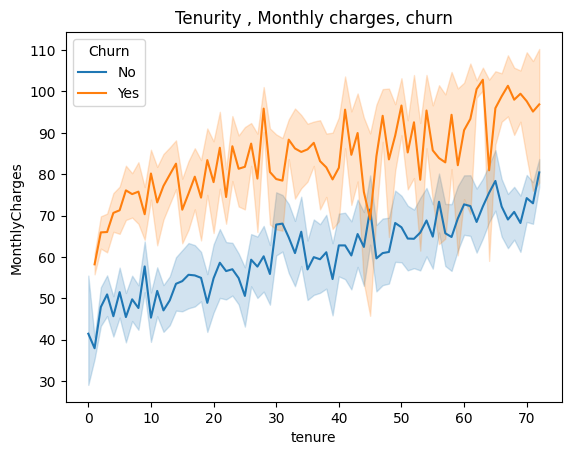

In [ ]:
#Tenurity , Monthly charges, churn
sns.lineplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df)
plt.title('Tenurity , Monthly charges, churn')
plt.show()


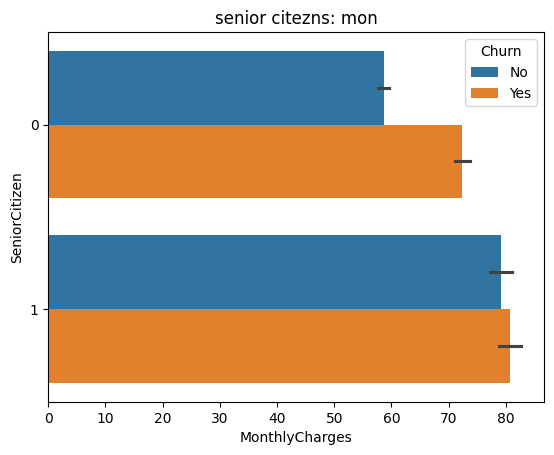

In [ ]:
#Tenurity , Senioity, churn
sns.barplot(x='MonthlyCharges',y='SeniorCitizen',hue='Churn',data=df)
plt.title('senior citezns: mon')
plt.show()

In [ ]:
df.groupby('Contract')['MonthlyCharges'].median()
## this assumption isn't fully correct or we can not think about it as a matter

,MonthlyCharges
Contract,
Month-to-month,73.25
One year,68.75
Two year,64.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

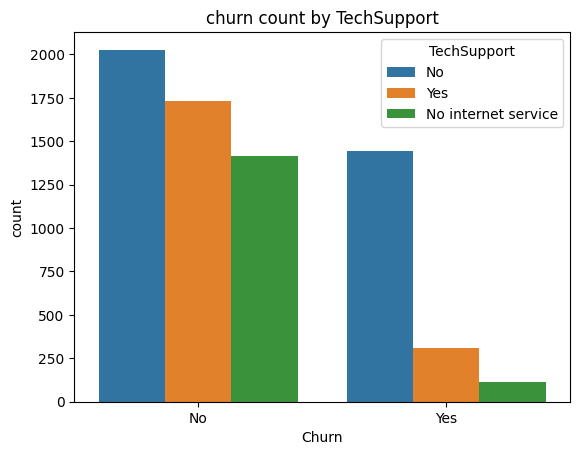

In [ ]:
sns.countplot(x='Churn',hue='TechSupport',data=df)
plt.title('churn count by TechSupport')
plt.show()
## customers without tech support are most likely to churn,
## fiber optic servise need to be revisited due to high churned customers subscribes in thisi service

In [ ]:
# Answering Business Questions:
# 1. What percentage of customers are leaving the company? 26.5%
# 2. Is there a specific point in the customer lifecycle when churn is most likely to happen? new customer most likly to chrun
# 3. Do contract types influence churn behavior? month-to-month
# 4. Are customers with higher bills more likely to leave? High Monthly Chareges are potential to churn
# 5. Does the availability of technical services affect customer retention? Customers without tech support most likely to churn, Fiber obtic service need to revisted due to high chured customers who subscribed in this service.
# 6. Do senior citizens behave differently when it comes to churn? No
# 7. Can we identify a high-risk customer profile based on multiple variables?
# Customers with short tenure, high monthly chanrges, month-month cotract will churn